# Linear Regression

## Introduction

Linear regression is one of the fundamental machine learning techniques used for modeling the relationship between one (i.e. simple linear regression) or multiple (i.e. multiple linear regression) independent variables and one dependent variable. Independent variables are often called features, and dependent variables -- target variables. Linear regression can be thought as (and really is) fitting a linear or nonlinear function based on existing inputs and outputs. The term "linear" stems from the fact that the relationship being modeled is a linear combination of its weights and features, although it is possible to model a nonlinear relationship by introducing additional features based on the given ones.

The linear relationship being modeled is expressed rather simply as a weighted sum of features:
$$\hat{y}_j=w^Ta_j,$$ where $y_j$ is an output corresponding to the j-th sample, $w\in\mathbb{R}^{m}$ is a column-vector containing model parameters (weights), $a_j\in\mathbb{R}^m$ is the j-th sample, and $m$ is the number of features. The dataset is represented by a matrix $A\in\mathbb{R}^{n\times m}$ containing samples row-wise and a column-vector $y\in\mathbb{R}^n$ containing corresponding outputs as follows: $$A=\begin{bmatrix}a_1^T\\a_2^T\\\vdots\\a_n^T\end{bmatrix},\quad y=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix},$$ where $n$ is the number of samples in the dataset.

The dataset consisting of $A$ and $y$ is used to determine $w$. The particular way of determining $w$ depends on the type of the linear regression used. In the exercises below we will be dealing with three basic types of linear regression.

## Least Square Regression

The most straightforward way to determine $w$ is to employ the ordinary least squares approach. The least squares estimation of the parameters is formulated as the following quadratic programming problem:
$$\min_w\frac{1}{2}\lVert y-Aw\rVert_2^2$$

Use the first-order optimality condition to derive the optimal $w$ for the least squares linear regression.

The first-order optimality condition: a continuous function $f(x)$ has a stationary point $x^*$ if $\nabla_xf(x^*)=0$.

The strategy is to find the gradient of the objective function of the least squares problem, equate it to zero and to solve the resulting linear system to obtain an expression for the optimal solution.

**Hint:**  You can utilize matrix calculus to obtain the gradient using scalar-by-vector identities listed in [[1](#references)].

Finally, you should arrive at the following expression:

$$w_{ols}=(A^TA)^{-1}A^Ty,$$

where $w_{ols}$ is the vector of optimal weights for the ordinary least squares regression.

Implement the function to compute the regression parameters $w$ using the ordinary least squares.

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [1]:
def ols(A, y):
  # Compute w
  w = la.inv(A.T @ A) @ A.T @ y
  return w

For the following samples and values of the target variable find the optimal weights of the linear regression using the ordinary least squares. The output should be:

[ 1.466 -0.534]

In [3]:
A = np.array([[1, 2], [2, 1], [3, 4], [4, 3]])
y = np.array([1, 3, 2, 4])
w = ols(A, y)
print(np.around(w, 3))

[ 1.466 -0.534]


## Ridge Regression - L2 Regularization

In some cases the least squares linear regression is prone to overfitting. Overfitting can be avoided by employing regularization. Ridge regression extends the previously formulated optimization problem by including the L2 penalty term as below:

$$\min_w\frac{1}{2}\lVert y-Aw\rVert_2^2+\frac{1}{2}\lambda\lVert w\rVert_2^2,$$

where $\lambda$ is the L2-regularization parameter.

Use the first-order optimality condition and the results of the previous exercise to derive the optimal $w$ for Ridge regression. As in **Exercise 1** you can use the same strategy and utilize matrix calculus to obtain the gradient using scalar-by-vector identities listed in [[1](#references)].

Finally, you should arrive at the following expression:

$$w_{ridge}=(A^TA+\lambda I)^{-1}A^Ty,$$

where $w_{ridge}$ is the vector of optimal weights for Ridge regression.

Implement the function to compute the regression parameters $w$ using Ridge regression.

In [8]:
def ridge(A, y, Lambda):
  # Compute w
  w = la.inv(A.T @ A + Lambda * np.eye(A.shape[1])) @ A.T @ y
  return w

For the following samples and values of the target variable find the optimal weights of the linear regression using Ridge regression. The output should be:

[0.196 0.291]





In [9]:
A = np.array([[1, 2],[3, 4]])
y = np.array([1, 2])
Lambda = 5
w = ridge(A, y, Lambda)
print(np.around(w, 3))

[0.196 0.291]


## Lasso Regression - L1 Regularization

Ridge regression is able to tackle overfitting but it cannot perform the feature selection, i.e. all features will stay accounted for. LASSO regression solves this problem by using the L1 penalty term instead of L2 as below:

$$\min_w\frac{1}{2}\lVert y-Aw\rVert_2^2+\frac{1}{2}\lambda\lVert w\rVert_1,$$

where $\lambda$ is the L1-regularization parameter.

Unfortunately there is no closed-form expression for the optimal $w$ since the absolute value is not differentiable at zero. However, there is a multitude of iterative methods to solve this problem. One of these methods is the **shooting method** which is the most simple to implement and does not take too many iterations to converge [[2](#references)]. The algorithm behind the shooting method can be represented as:



1.   Initialize $w$ with the corresponding Ridge regression parameters;
2.   For all pairs of integers $1\leq j,k\leq m$ compute $\alpha_j$, and $\beta_{jk}$ using the formulae below:
$$\alpha_j=-A_j^Ty,$$
$$\beta_{jk}=A_j^TA_k,$$
where $A_j^T$ is the transpose of the j-th column of $A$, and $A_k$ is the k-th column of $A$;
3.   For all integers $1\leq j\leq m$ compute $S_j$ as follows:
$$S_j=\alpha_j+\sum_{k=1\\k\neq j}^m\beta_{jk}w_k;$$
4.   For all integers $1\leq j\leq m$ update $w_j$:
$$w_j=\begin{cases}
\frac{\lambda-S_j}{\beta_{jj}}, & S_j>\lambda\\
\frac{-\lambda-S_j}{\beta_{jj}}, & S_j<\lambda\\
0, & |S_j|\leq\lambda\\
\end{cases}$$
5.   Repeat (3) if not converged.

By convergence we assume small improvement of the objective function or exceeding the maximum number of iterations:
$$J(w_j^{prev})-J(w_j^{curr})<\epsilon,$$
where $w_j^{curr}$ is the current parameters, $w_j^{prev}$ is the previous parameters, and $\epsilon$ is the tolerance.

First, we define the function to compute the squared 2-norm $\lVert\dots\rVert_2^2$ and the function to compute the LASSO objective function. In the cell below you need to implement the objective function.

In [13]:
def norm2sq(x):
  return np.dot(x.T, x)

def lasso_obj(A, y, w, Lambda):
  # Compute the objective function using norm2sq
  J = .5 * norm2sq(y - A @ w) + .5 * Lambda * la.norm(w, 1)
  return J

Compute the value of the LASSO objective function for the following data. The output should be:

765.5

In [14]:
A = np.array([[1, 2],[3, 4]])
y = np.array([1, 2])
w = np.array([3, 7])
Lambda = 5
J = lasso_obj(A, y, w, Lambda)
print(np.around(J, 3))

765.5


Then we define the function computing LASSO regression parameters according to the algorithm above. Here you need to implement the steps 2 and 4 of the algorithm.

In [15]:
def lasso(w_ridge, A, y, Lambda, eps, max_iter):
  # Initialize the parameters and the iteration counter
  w = np.copy(w_ridge)
  iter = 0

  # Initialize the previous and the current objective function values
  prev = np.inf
  curr = lasso_obj(A, y, w, Lambda)

  # Compute alpha_j and beta_jk (step 2)
  #       alpha is a vector containing all alpha_jk, and
  #       beta is a matrix containing all beta_jk
  alpha = - A.T @ y
  beta = A.T @ A

  # Iterate until convergence
  while (prev - curr) > eps and iter < max_iter:
    # Process each w_j
    for j in range(w.size):
      # Compute S_j (step 3)
      S_j = alpha[j]
      for k in range(w.size):
        if k != j:
          S_j = S_j + beta[j, k] * w[k]

      # Update w_j (step 4)
      if S_j > Lambda:
        w[j] = (Lambda - S_j) / beta[j,j]
      elif S_j < -Lambda:
        w[j] = (-Lambda - S_j) / beta[j,j]
      else:
        w[j] = 0

    # Compute the objective function
    prev = curr
    curr = lasso_obj(A, y, w, Lambda)

    # Increment the iteration counter
    iter = iter + 1
  return w

For the following samples and values of the target variable find the optimal weights of the linear regression using LASSO regression. The output should be:

[ 1.216 -0.284]

In [16]:
# Prepare the dataset
A = np.array([[1, 2], [2, 1], [3, 4], [4, 3]])
y = np.array([1, 3, 2, 4])

# Find initial weights with Ridge regression
Lambda_ridge = 5
w_ridge = ridge(A, y, Lambda_ridge)

# Find weights for LASSO regression
Lambda = .5
eps = 1e-8
max_iter = 500
w = lasso(w_ridge, A, y, Lambda, eps, max_iter)
print(np.around(w, 3))

[ 1.216 -0.284]


## Regression Application

Now we are going to use these types of linear regression to fit the following polynomial:

$$\hat{f}(x)=b_mx^m+b_{m-1}x^{m-1}+\ldots+b_1x+b_0$$

Let us generate the initial dataset by sampling $n$ values of the nonlinear function $f(x)=e^x$ and adding normally distributed noise to the samples. The resulting data is the input vector $x$ and the output vector $y$.

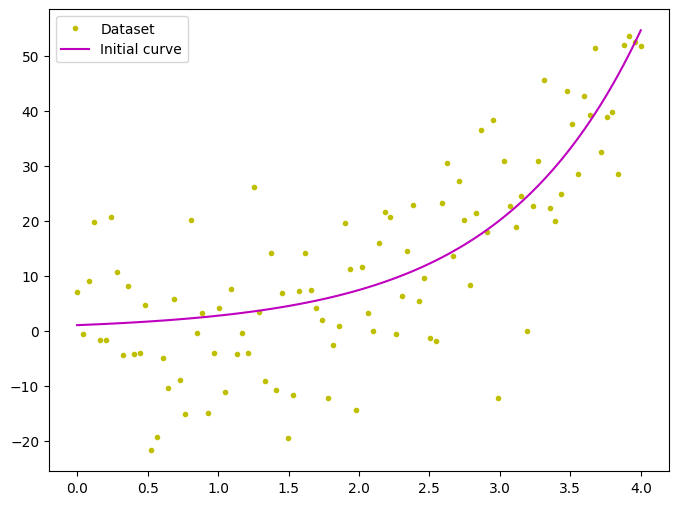

In [17]:
# Define the number of samples
n = 100

# Define the sampling boundaries
x1 = 0
x2 = 4

# Define the noise parameters
mean = .0
std = 12.25

# Ensure reproducibility by making random number generator produce the same
# values at new executions
np.random.seed(42)

# Generate the samples
x = np.linspace(x1, x2, n)
y = np.exp(x) + np.random.normal(mean, std, n)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'y.')
plt.plot(x, np.exp(x), 'm')
plt.legend(['Dataset', 'Initial curve'])
plt.show()

Before proceeding any further we have to tailor the task to the linear regression. The powers of $x$ can be represented as separate features. We can also account for the bias $b_0$ by introducing an additional feature having the value of one for all samples in the initial dataset. The matrix of inputs, the vector of outputs, and the vector of parameters are therefore:

$$A=\begin{bmatrix}
1 & x_1 & x_1^2 & \ldots & x_1^m\\
1 & x_2 & x_2^2 & \ldots & x_2^m\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & \ldots & x_n^m\\
\end{bmatrix},\quad y=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix},\quad w=\begin{bmatrix}b_0\\b_1\\\vdots\\b_m\end{bmatrix}$$

Now we can generate the dataset for the linear regression task.

In [18]:
# Define the number of powers
m = 10

# Allocate memory for the matrix of samples
A = np.zeros((n, m + 1))

# Fill the first (ones) and the second (first power of x) column
A[:, 0] = np.ones(n)
A[:, 1] = x

# Fill the rest columns (powers of x from 2 to m)
for i in range(2, m + 1):
  A[:, i] = x ** i

Finally, we can proceed to fitting the polynomial using previously implemented estimators.

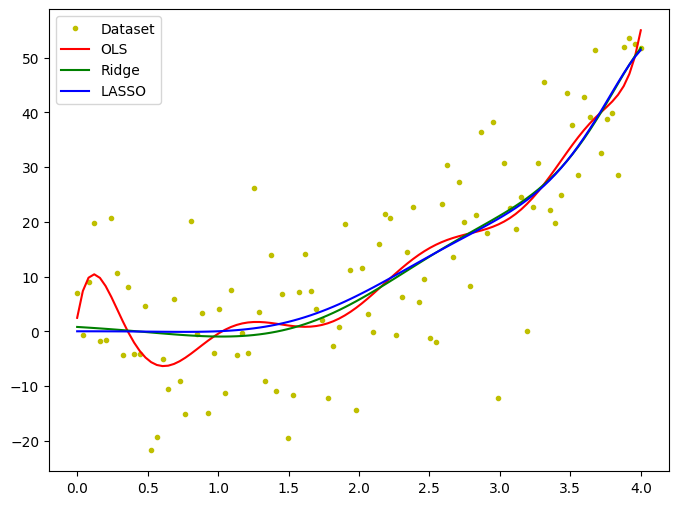

In [19]:
# Estimate the model parameters for each type of linear regression
w_ols = ols(A, y)
w_ridge = ridge(A, y, 10)
w_lasso = lasso(w_ridge, A, y, 80, 1e-8, 1000)

# Evaluate the models
y_ols = np.dot(A, w_ols)
y_ridge = np.dot(A, w_ridge)
y_lasso = np.dot(A, w_lasso)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'y.')
plt.plot(x, y_ols, 'r-')
plt.plot(x, y_ridge, 'g-')
plt.plot(x, y_lasso, 'b-')
plt.legend(['Dataset', 'OLS', 'Ridge', 'LASSO'])
plt.show()

As it can be seen from the graph the model obtained with the ordinary least squares demonstrates some degree of overfitting: it tries to model oscillations which were not present in the underlying relationship. The models obtained via Ridge and LASSO regression show steady exponential behaviour which is consistent with the characteristics of the function used to generate the dataset.

However, there is a significant difference between how Ridge and LASSO regression performed their task of parameter estimation. Let us take a look at the resulting parameters of the two models.

In [20]:
print('w for Ridge:\n', w_ridge)
print('w for LASSO:\n', w_lasso)

w for Ridge:
 [ 0.79502304 -1.53150239 -0.84997144 -0.15391025  0.3056883   0.46645901
  0.22283341 -0.2434941   0.02015839  0.01307804 -0.00204859]
w for LASSO:
 [ 0.          0.          0.         -0.66767893  0.13509708  0.52244821
  0.22754412 -0.2432447   0.02006299  0.01304724 -0.00205729]


For Ridge regression all coefficients are non-zero meaning that it preserved all features. Conversely, the first three corresponding coefficients for LASSO regression are zero, hence LASSO discarded tрe first three features. Therefore, LASSO performed feature selection in addition to avoiding overfitting.

<a name="references"></a>

## References

1.   https://en.wikipedia.org/wiki/Matrix_calculus#:~:text=partial%20%5Cmathbf%20%7Bg%7D%20%7D%7D%7D-,Scalar%2Dby%2Dvector%20identities,-%5Bedit%5D
2.   Schmidt, Mark. (2005). Least Squares Optimization with L1-Norm Regularization.




